In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

newdf = pd.read_excel('Volve production data.xlsx')

In [2]:
#Roundinf off the data to the nearest integer
newdf = np.round(newdf)

In [3]:
#Data is highly skewed and depends on the well,hence i have used padding to fill the missing values 
newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')

newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')

newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].fillna(method='pad')

newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')

newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')

newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')

newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')

newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')

newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].fillna(method='pad')

newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')


In [4]:
#Carrying out dimensionality reduction on the original dataframe
#Dropping unnecessary features: WELL_BORE_CODE, NPD_WELL_BORE_NAME, NPD_FIELD_NAME, NPD_FIELD_CODE,NPD_FACILITY_CODE,NPD_FACILITY_NAME

to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdf = newdf.drop(to_drop, axis=1)
#print(newdf.info())

In [5]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(newdf[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P']])


#Taking the data of wells 2 to 4 since they were the ones with the east number of missing values
fdf = newdf.loc[746 : 8022]

X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()

In [6]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

In [7]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [8]:
X = fdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= fdf['BORE_OIL_VOL']

In [9]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = reg_all.predict(x_test_final)

In [11]:
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_final, y_test_final))

The R2 value for linear regression for oil volume production is 0.5542109655694217


In [12]:
# Applying Polynomisl Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train_final)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train_final)
x_pol_test = poly_reg.fit_transform(x_test_final)



#print("The R2 value for Ridge regression for oil volume production is",ridge.score(x_test_final, y_test_final))

In [13]:
y_pred = lin_reg.predict(x_pol_test)

In [14]:
print("The R2 value for Ridge regression for oil volume production is",lin_reg.score(x_pol_test, y_test_final))

The R2 value for Ridge regression for oil volume production is 0.9673070832020679


In [15]:
df = pd.DataFrame({'Real Values':y_test_final, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
6805,643.0,513.246127
6756,613.0,376.370945
5221,4634.0,4390.115907
4435,688.0,670.462553
5261,3571.0,3626.756712
...,...,...
6803,938.0,701.256185
5512,4326.0,3609.583938
2494,4199.0,4657.985393
7307,311.0,485.010875


In [16]:
X_test.groupby(['NPD_WELL_BORE_CODE']).agg({"DATEPRD":"count"})

,DATEPRD
NPD_WELL_BORE_CODE,
5351,910
5599,914
7078,360


## Actual V/S Model Prediction plot for Well No.- 5599

### Linear Regression

C:\Users\Jayesh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872038


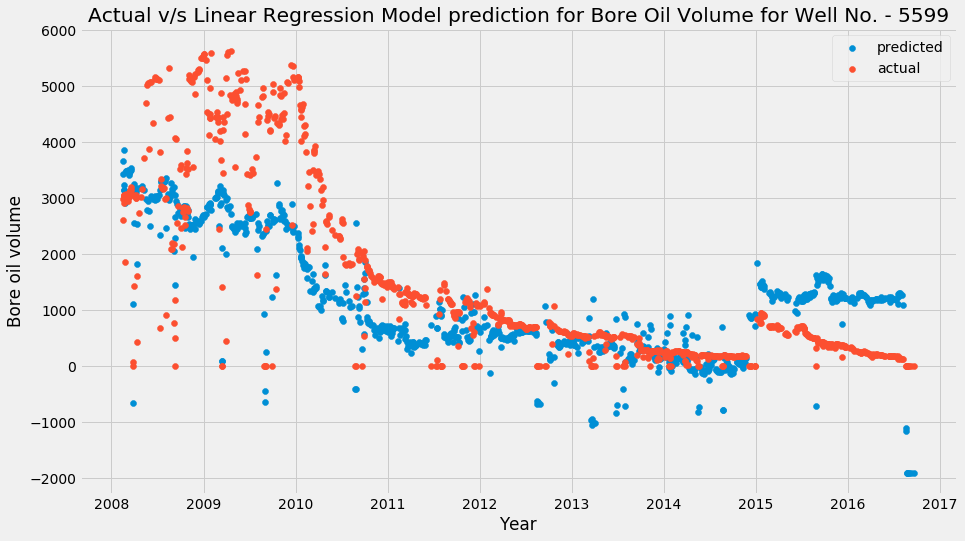

In [17]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5599final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))


The R2 value for linear regression for oil volume production in well 5599 is 0.6750225210254925
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is 0.9643214901026707


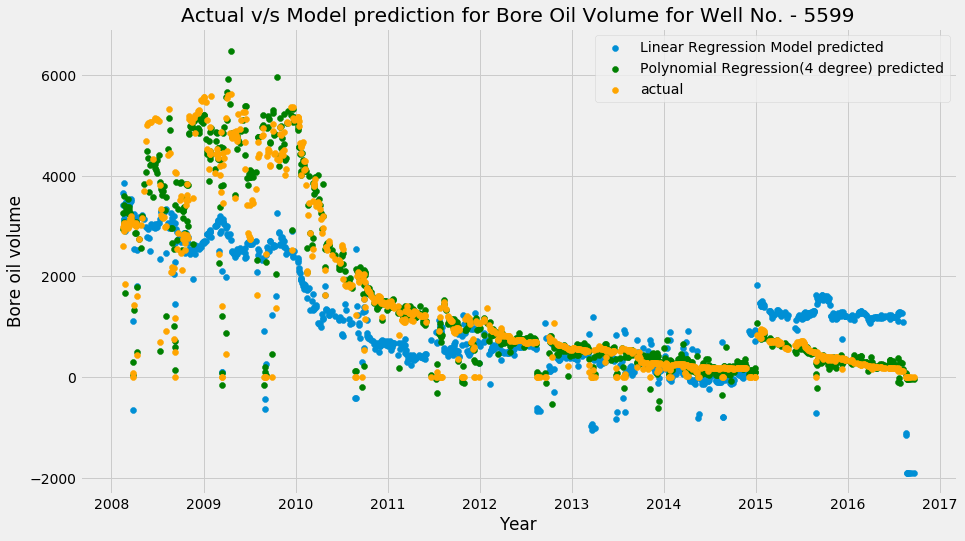

In [31]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5599final)


x_pol_test_5599 = poly_reg.fit_transform(x_test_5599final)
y_poly = lin_reg.predict(x_pol_test_5599)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5599')

print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5351final,y_test_5351_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is", lin_reg.score(x_pol_test_5351,y_test_5351_final ))



## Actual V/S Model Prediction plot for Well No.- 5351

### Linear Regression

The R2 value for linear regression for oil volume production is 0.6750225210254925


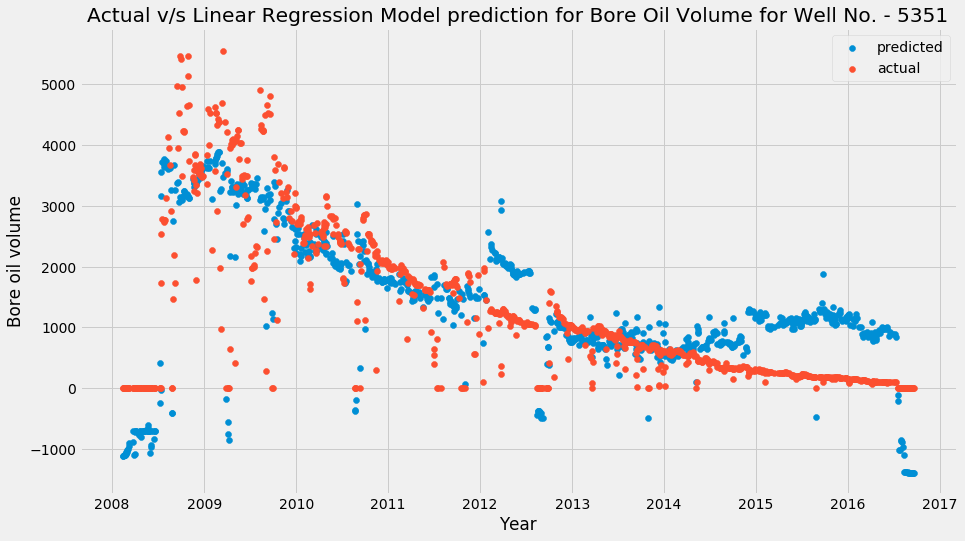

In [19]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5351final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_5351final,y_test_5351_final ))


The R2 value for linear regression for oil volume production in well 5351 is 0.6750225210254925
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is 0.9643214901026707


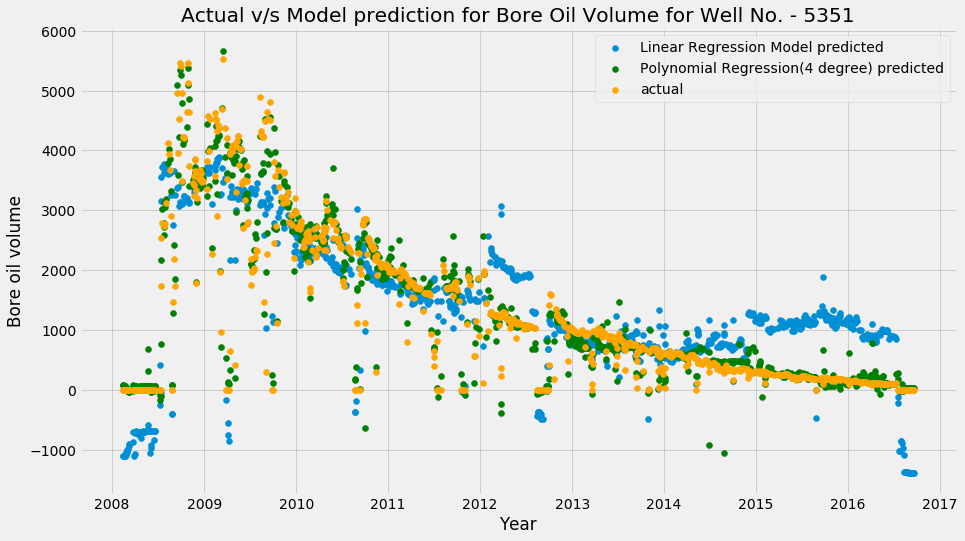

In [25]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5351final)


x_pol_test_5351 = poly_reg.fit_transform(x_test_5351final)
y_poly = lin_reg.predict(x_pol_test_5351)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5351')

print("The R2 value for linear regression for oil volume production in well 5351 is", reg_all.score(x_test_5351final,y_test_5351_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is", lin_reg.score(x_pol_test_5351,y_test_5351_final ))


## Actual V/S Model Prediction plot for Well No.- 7078

### Linear Regression

The R2 value for linear regression for oil volume production in well 7078 is -3.0140537511264807


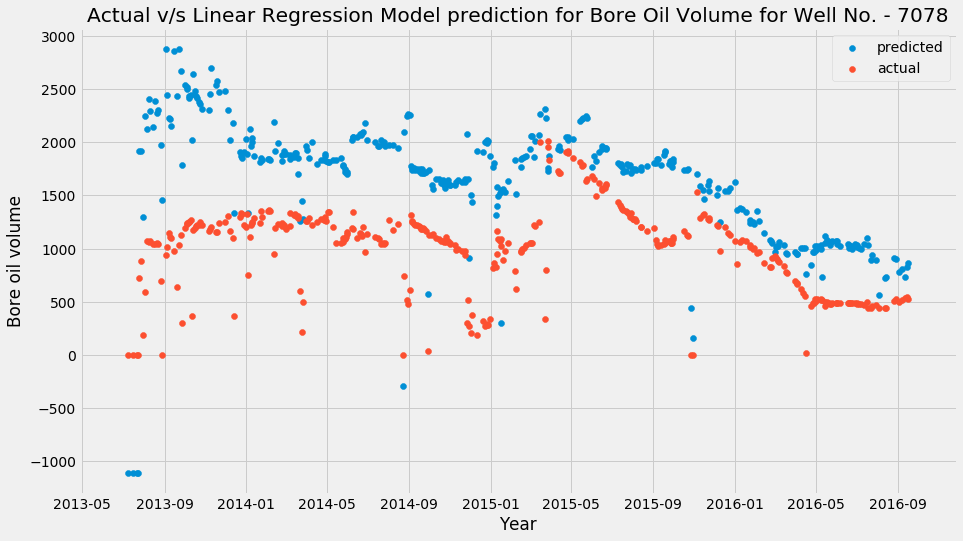

In [24]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_7078final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 7078')

y_test_7078_final = y_test_7078['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))


The R2 value for linear regression for oil volume production in well 7078 is -3.0140537511264807
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is 0.7084983033730887


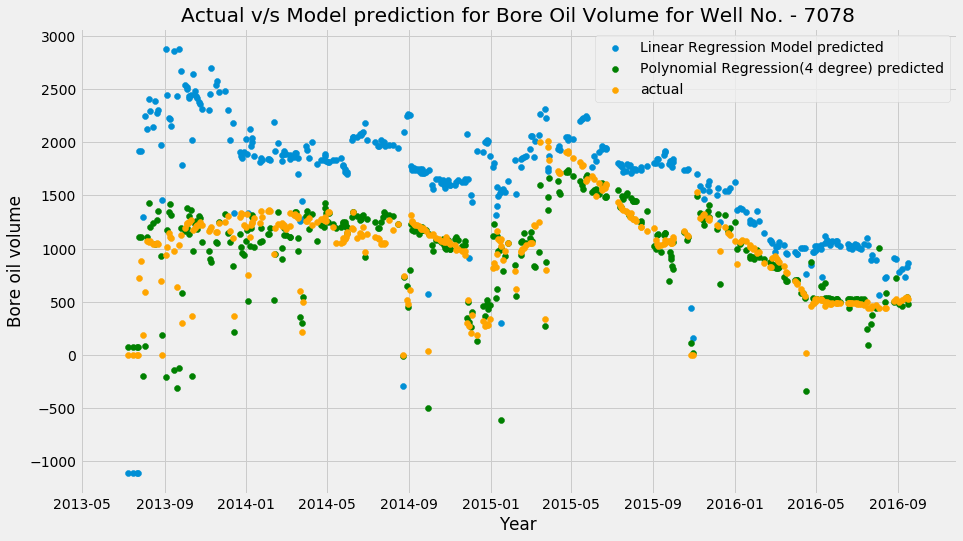

In [27]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_7078final)


x_pol_test_7078 = poly_reg.fit_transform(x_test_7078final)
y_poly = lin_reg.predict(x_pol_test_7078)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 7078')

print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is", lin_reg.score(x_pol_test_7078,y_test_7078_final ))
